In [130]:
import numpy as np
import matplotlib.pyplot as plt

# Create a random connectivity graph
def random_directed_graph(n, p):
    m = np.zeros((n,n), dtype=bool)
    for i in range(n):
        m[i] = np.random.uniform(0, 1, n) < p

    np.fill_diagonal(m, 0)
    return m

# Find all shortest paths
# Returns a matrix of shortest path lengths between nodes i and j, indexed same as input m
def shortest_path_lengths(m):
    D = np.full(m.shape, -1)   # 1) Initialize array as NAN
    D[m] = 1                   # 2) Loop over all true connections in M, set them as 1 in D
    
    L = 1
    while True:
        pairLst = np.array(np.where(D == L)).T
        
        # Stop when there are no pairs at current distance distance L
        if len(pairLst) == 0:
            break
        
        # For all pairs with distance L, loop over direct targets of the target
        # that are not yet assigned, set them to L+1
        for i, j in pairLst:
            trgLst = np.where(m[j])[0]
            for k in trgLst:
                if (D[i,k] == -1) and (k != i):
                    D[i,k] = L + 1
        
        # Increase L
        L += 1
    return D

def shortest_paths_yolo(m):
    D = np.full(m.shape, 0, dtype=int)
    D[m] = 1
    L = 2
    
    Myolo = m.copy()
    while True:
        Myolo = Myolo.dot(m)           # Propagate water flow by 1
        np.fill_diagonal(Myolo, 0)     # Remove self-connectivity
        Myolo[np.where(D != 0)] = 0    # Remove all distances that have already been marked
        
        # Stop when there are no pairs at current distance distance L
        if np.all(Myolo == 0):
            break
        
        # Set values
        D[np.where(Myolo != 0)] = L
        
        L += 1
        
    D[np.where(D == 0)] = -1
    return D

In [131]:
def dist_frac_nan(D):
    n = D.shape[0]
    connMax = n*(n-1)
    connTrue = np.sum(D != -1)
    return connTrue / connMax

def dist_mean(D):
    return np.mean(D[np.where(D != -1)])

def dist_max(D):
    return np.max(D[np.where(D != -1)])

In [132]:
m1 = random_directed_graph(100, 0.02)

In [136]:
%%timeit
d1 = shortest_path_lengths(m1)

19.1 ms ± 406 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [137]:
%%timeit
d2 = shortest_paths_yolo(m1)

8.31 ms ± 86.7 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [110]:
print('Fraction of accessible connections', dist_frac_nan(d1))
print('Mean distance', dist_mean(d1))
print('Max distance', dist_max(d1))

Fraction of accessible connections 0.6627272727272727
Mean distance 5.106843468983387
Max distance 13


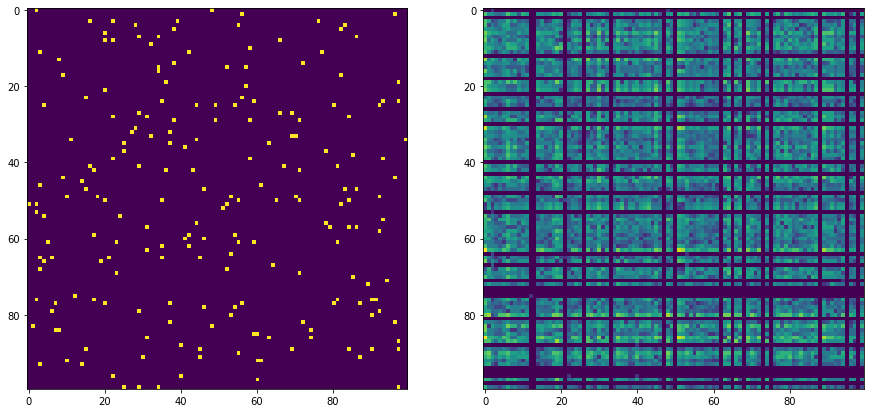

In [111]:
fig, ax = plt.subplots(ncols=2, figsize=(15,7.5))
ax[0].imshow(m1)
ax[1].imshow(d1)
plt.show()

In [138]:
# Simulation
pLst = np.arange(0.01, 0.4, 0.001)
fracLst = []
meanLst = []
maxLst = []

for p in pLst:
    m = random_directed_graph(100, p)
    d = shortest_paths_yolo(m)
    
    fracLst += [dist_frac_nan(d)]
    meanLst += [dist_mean(d)]
    maxLst += [dist_max(d)]    

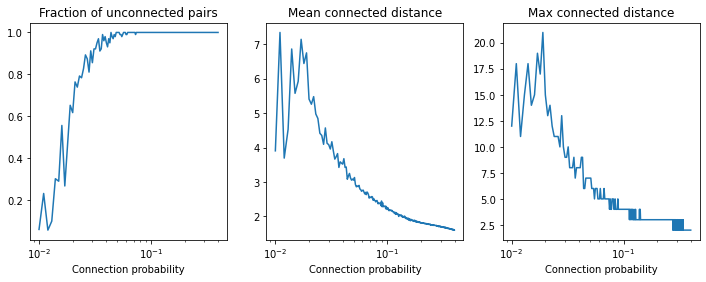

In [139]:
fig, ax = plt.subplots(ncols=3, figsize=(12,4))
ax[0].semilogx(pLst, fracLst)
ax[1].semilogx(pLst, meanLst)
ax[2].semilogx(pLst, maxLst)
ax[0].set_title('Fraction of unconnected pairs')
ax[1].set_title('Mean connected distance')
ax[2].set_title('Max connected distance')
ax[0].set_xlabel('Connection probability')
ax[1].set_xlabel('Connection probability')
ax[2].set_xlabel('Connection probability')

plt.show()